# The Dataset

## Import Libraries, dataset and make seaborn library default for visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

In [2]:
# load dataset and preview the first 5 and last 5 rows 
arrests = pd.read_csv("https://s3-us-gov-west-1.amazonaws.com/cg-d3f0433b-a53e-4934-8b94-c678aa2cbaf3/arrests_national_adults.csv")
arrests

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,180,165,150,157,140,...,241,229,189,136,107,102,74.00,38.00,28.00,12581,263887632,4263,1373,103,183
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,6482,6934,7824,8327,8595,...,13141,10588,8121,5754,4879,3996,"2,343.00",961.00,713.00,12581,263887632,183478,94982,5365,6129
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,14756,16192,18911,20346,21466,...,40311,32734,25716,18433,15443,12005,"6,697.00","3,166.00","2,344.00",12581,263887632,514297,237138,12418,14376
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,6501,5568,5127,4981,4907,...,5861,4988,3665,2309,1788,1279,621.00,286.00,170.00,12581,263887632,101778,39235,2035,1323
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,6446,6505,8259,7595,7362,...,12262,9622,7742,5666,5047,4085,"2,464.00","1,098.00",928.00,12581,263887632,161655,73552,2556,9460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,416,NaN,1994,ASR_STP,Stolen Property,10713,208091172,84889,13994,8768,7280,5748,5095,4527,4188,...,2858,2613,1850,907,403,148,70.00,24.00,41.00,10282,207684879,56631,40612,875,568
640,417,NaN,1994,ASR_SUS,Suspicion,10713,208091172,8230,1465,356,352,309,330,331,368,...,347,347,232,128,45,15,9.00,5.00,8.00,10282,207684879,4508,5116,26,41
641,418,NaN,1994,ASR_VAG,Vagrancy,10713,208091172,14039,3782,922,738,580,469,449,480,...,907,915,551,218,115,37,16.00,12.00,16.00,10282,207684879,9716,7678,60,361
642,419,NaN,1994,ASR_VAN,Vandalism,10713,208091172,117143,20803,12776,9848,7384,6752,6030,5703,...,4371,3851,2603,1290,627,281,128.00,78.00,112.00,10282,207684879,96043,38502,1417,1708


In [3]:
# set seaborn as default for visualizations
sns.set()

## Explore the dataset for summaries
Set index, check info, summary statistics

In [4]:
# From the table, the id appears to be a candidate for index
# check for uniquness 
arrests.index
print()
arrests.shape[0]
print()
arrests['id'].nunique()
print()
arrests['id'].count()


RangeIndex(start=0, stop=644, step=1)

644

644

644

In [5]:
# Yes! id can conveniently be set as the index
arrests.set_index('id', inplace=True)
arrests

,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,180,165,150,157,140,160,...,241,229,189,136,107,102,74.00,38.00,28.00,12581,263887632,4263,1373,103,183
1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,6482,6934,7824,8327,8595,8741,...,13141,10588,8121,5754,4879,3996,"2,343.00",961.00,713.00,12581,263887632,183478,94982,5365,6129
1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,14756,16192,18911,20346,21466,22196,...,40311,32734,25716,18433,15443,12005,"6,697.00","3,166.00","2,344.00",12581,263887632,514297,237138,12418,14376
1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,6501,5568,5127,4981,4907,4978,...,5861,4988,3665,2309,1788,1279,621.00,286.00,170.00,12581,263887632,101778,39235,2035,1323
1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,6446,6505,8259,7595,7362,7000,...,12262,9622,7742,5666,5047,4085,"2,464.00","1,098.00",928.00,12581,263887632,161655,73552,2556,9460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,NaN,1994,ASR_STP,Stolen Property,10713,208091172,84889,13994,8768,7280,5748,5095,4527,4188,3868,...,2858,2613,1850,907,403,148,70.00,24.00,41.00,10282,207684879,56631,40612,875,568
417,NaN,1994,ASR_SUS,Suspicion,10713,208091172,8230,1465,356,352,309,330,331,368,329,...,347,347,232,128,45,15,9.00,5.00,8.00,10282,207684879,4508,5116,26,41
418,NaN,1994,ASR_VAG,Vagrancy,10713,208091172,14039,3782,922,738,580,469,449,480,422,...,907,915,551,218,115,37,16.00,12.00,16.00,10282,207684879,9716,7678,60,361


In [6]:
arrests.describe()

,state_abbr,year,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,m_30_34,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
count,0.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,644.00,...,644.00,644.00,644.00,644.00,644.00,644.00,638.00,626.00,634.00,644.00,644.00,644.00,644.00,644.00,644.00
mean,NaN,"2,005.00","11,506.70","228,350,278.09","248,667.36","73,147.94","13,316.27","13,608.58","12,801.47","11,886.40","11,028.52","10,331.22","9,821.37","40,952.93","33,867.28",...,"12,520.61","10,924.52","9,432.72","7,270.86","4,836.30","2,695.49","1,265.24",572.30,495.76,"11,086.00","227,247,324.87","219,808.69","92,455.00","3,578.47","4,389.73"
std,NaN,6.64,"1,294.09","23,172,999.95","427,698.53","124,571.62","20,826.68","22,297.81","21,504.25","20,612.42","19,479.93","18,395.07","17,673.21","73,747.83","61,089.34",...,"22,712.79","19,407.63","16,464.86","12,759.45","8,832.71","5,232.57","2,549.75","1,158.87","1,033.72","1,179.37","22,692,554.66","367,579.84","171,768.11","6,475.39","7,775.25"
min,NaN,"1,994.00","9,491.00","194,637,946.00",526.00,127.00,19.00,15.00,21.00,19.00,23.00,25.00,17.00,91.00,60.00,...,19.00,18.00,11.00,8.00,3.00,2.00,1.00,1.00,1.00,"9,219.00","193,511,075.00",354.00,138.00,4.00,1.00
25%,NaN,"1,999.00","10,046.00","206,783,051.00","16,017.00","4,413.75",695.25,687.75,669.75,634.75,578.50,522.50,470.00,"2,102.75","1,900.25",...,628.50,577.00,593.00,450.50,234.75,111.00,52.00,23.00,18.00,"9,741.00","206,316,831.00","11,457.75","7,858.75",256.50,239.00
50%,NaN,"2,005.00","11,745.00","228,414,560.00","67,202.50","21,036.00","5,146.00","5,084.00","4,552.50","3,855.00","3,335.50","2,877.50","2,627.00","11,260.00","10,124.50",...,"3,652.50","3,120.50","2,660.50","1,852.50",975.50,422.50,180.00,78.50,60.50,"11,212.00","227,823,799.00","55,756.50","32,328.00","1,250.00",750.50
75%,NaN,"2,011.00","12,727.00","250,795,788.00","286,525.50","79,933.50","14,753.50","13,409.00","12,886.50","13,216.25","11,392.00","10,637.50","9,898.00","41,551.25","32,222.50",...,"11,628.50","10,584.25","9,813.50","7,932.00","5,310.00","2,754.25","1,219.50",516.75,390.25,"12,208.00","248,091,098.00","253,871.75","94,523.00","3,128.50","6,867.75"
max,NaN,"2,016.00","13,404.00","264,534,532.00","2,236,508.00","675,720.00","107,433.00","113,653.00","112,307.00","113,760.00","103,613.00","102,882.00","99,314.00","415,044.00","390,070.00",...,"139,159.00","118,789.00","91,359.00","75,771.00","53,602.00","33,395.00","18,503.00","8,125.00","8,543.00","12,728.00","263,887,632.00","1,867,371.00","991,739.00","37,374.00","50,532.00"


In [7]:
# highest record for male
arrests[arrests['total_male']==2236508]

# lowest record for male
arrests[arrests['total_male']==526]

,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
411,NaN,1994,ASR_OTH,All Other Offenses,10713,208091172,2236508,471879,106769,113653,109348,107252,103613,102882,99314,...,96165,95505,69398,37519,17862,8356,"3,893.00","2,235.00","3,038.00",10282,207684879,1665327,991739,23801,25427


,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
949,NaN,2013,ASR_SUS,Suspicion,12397,257195726,526,148,32,24,21,37,37,35,26,...,23,18,21,11,4,6,2.00,2.00,NaN,11925,248045485,354,275,13,12


In [8]:
# highest record for female
arrests[arrests['total_female']==675720]

# lowest record for female
arrests[arrests['total_female']==127]

,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1027,NaN,2016,ASR_OTH,All Other Offenses,13310,264534532,1889247,675720,45099,55750,61572,67406,70304,73344,75213,...,139159,118789,91359,60130,46891,33395,"18,503.00","8,125.00","5,956.00",12581,263887632,1762233,699715,35101,50532


,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
918,NaN,2012,ASR_RPE,Rape,12850,254953025,13007,127,762,657,630,583,540,524,444,...,28,21,15,14,3,5,NaN,1.00,1.00,12341,254321505,8440,4214,211,203


In [9]:
arrests.filter(like='m_')
print("There are", arrests.filter(like='m_').shape[1] + arrests.filter(like='f_').shape[1], "columns for the various age distributions")

,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,m_30_34,m_35_39,m_40_44,m_45_49,m_50_54,m_55_59,m_60_64,m_65p
id,,,,,,,,,,,,,,,,
1009,161,180,165,150,157,140,160,748,655,549,379,308,334,223,119,81
1010,5780,6482,6934,7824,8327,8595,8741,41655,35024,27837,19331,16523,13550,9190,4590,3793
1011,14018,14756,16192,18911,20346,21466,22196,104402,88978,72203,51692,44598,36523,23302,11381,9229
1012,7077,6501,5568,5127,4981,4907,4978,22425,17522,12755,7861,6866,5020,2943,1119,563
1013,6997,6446,6505,8259,7595,7362,7000,30066,24432,19210,13995,13421,12472,9095,4513,3354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,8768,7280,5748,5095,4527,4188,3868,15221,12273,8588,4862,2312,1089,546,260,264
417,356,352,309,330,331,368,329,1484,1573,1321,777,394,146,76,49,35
418,922,738,580,469,449,480,422,2032,2362,2205,1526,896,506,211,129,112


There are 32 columns for the various age distributions


In [10]:
# We get information about our datset
arrests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 1009 to 420
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_abbr              0 non-null      float64
 1   year                    644 non-null    int64  
 2   offense_code            644 non-null    object 
 3   offense_name            644 non-null    object 
 4   agencies                644 non-null    int64  
 5   population              644 non-null    int64  
 6   total_male              644 non-null    int64  
 7   total_female            644 non-null    int64  
 8   m_18                    644 non-null    int64  
 9   m_19                    644 non-null    int64  
 10  m_20                    644 non-null    int64  
 11  m_21                    644 non-null    int64  
 12  m_22                    644 non-null    int64  
 13  m_23                    644 non-null    int64  
 14  m_24                    644 non-null   

**year** column was stored as int. Hence, we need to convert it to a datetime data type


We also observed that there are 4 colums with missing data, and these columns are stored as **float**. 

There are over 17,000 police agencies in the United States which include municipal police departments, county sheriff's offices, state troopers, and federal law enforcement agencies)



In [11]:
# Convert 'year' to a datetime data type
arrests['year']= pd.to_datetime(arrests['year'], format='%Y')




# Dealing with missing numbers

In [12]:
# Count the number of missing values in each column
arrests.isna().sum()

state_abbr                644
year                        0
offense_code                0
offense_name                0
agencies                    0
population                  0
total_male                  0
total_female                0
m_18                        0
m_19                        0
m_20                        0
m_21                        0
m_22                        0
m_23                        0
m_24                        0
m_25_29                     0
m_30_34                     0
m_35_39                     0
m_40_44                     0
m_45_49                     0
m_50_54                     0
m_55_59                     0
m_60_64                     0
m_65p                       0
f_18                        0
f_19                        0
f_20                        0
f_21                        0
f_22                        0
f_23                        0
f_24                        0
f_25_29                     0
f_30_34                     0
f_35_39   

'f_55_59', 'f_60_64' and 'f_65p', which represents female from ages 55 and older, all have missing values. 

We can use a rule of thumb to dropping rows with missing data if it's less than 5 percent of the dataset.


In [13]:
# Removing "state_abbr" 
arrests.drop(['state_abbr'], axis = 1, inplace = True)

# Find the five percent threshold
threshold = len(arrests) * 0.05

# Create a filter
cols_to_drop = arrests.columns[arrests.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
arrests.dropna(subset=cols_to_drop, inplace=True)

arrests.isna().sum()


year                      0
offense_code              0
offense_name              0
agencies                  0
population                0
total_male                0
total_female              0
m_18                      0
m_19                      0
m_20                      0
m_21                      0
m_22                      0
m_23                      0
m_24                      0
m_25_29                   0
m_30_34                   0
m_35_39                   0
m_40_44                   0
m_45_49                   0
m_50_54                   0
m_55_59                   0
m_60_64                   0
m_65p                     0
f_18                      0
f_19                      0
f_20                      0
f_21                      0
f_22                      0
f_23                      0
f_24                      0
f_25_29                   0
f_30_34                   0
f_35_39                   0
f_40_44                   0
f_45_49                   0
f_50_54             

# Checking for data integrity
We observed that there is a column 'total_female' and 'total_male' which gives the total of all arrested female and male respectively. Accordingly, we can check the integrity of this dataset by asserting that the sum (computed manually) of all male and female arrested accross the various age distributions is equivalent to the stated 'total_male' and 'total_female' respectively.

## Dealing with data type
Having dealth with missing data, we proceeded to convert the float data type to integer. 

In [14]:
arrests.select_dtypes('float64')


,f_55_59,f_60_64,f_65p
id,,,
1009,74.00,38.00,28.00
1010,"2,343.00",961.00,713.00
1011,"6,697.00","3,166.00","2,344.00"
1012,621.00,286.00,170.00
1013,"2,464.00","1,098.00",928.00
...,...,...,...
416,70.00,24.00,41.00
417,9.00,5.00,8.00
418,16.00,12.00,16.00


In [15]:
arrests.loc[:, arrests.dtypes=='float64'] 

,f_55_59,f_60_64,f_65p
id,,,
1009,74.00,38.00,28.00
1010,"2,343.00",961.00,713.00
1011,"6,697.00","3,166.00","2,344.00"
1012,621.00,286.00,170.00
1013,"2,464.00","1,098.00",928.00
...,...,...,...
416,70.00,24.00,41.00
417,9.00,5.00,8.00
418,16.00,12.00,16.00


In [16]:
arrests.loc[:, arrests.dtypes=='float64'] = arrests.select_dtypes('float64').apply(lambda x: x.astype('int'))


In [17]:
# We did write assert statements making sure of conversion
assert arrests['f_55_59'].dtype == 'int'
assert arrests['f_60_64'].dtype == 'int'
assert arrests['f_65p'].dtype == 'int'

## Is the total arrest by gender equal to manually computed total?
1. Created a list of all the 16 male age distribution columns
2. Created a list of all the 16 female age distribution columns
3. Manually computed the total sum of male arrested using .sum()
4. Manually computed the total sum of female arrested using .sum()
5. Compared the computed total in step 3 with the recorded total_male column of the arrest dataset using .equals( )
6. Compared the computed total in step 4 with the recorded total_female column of the arrest dataset using .equals( )

In [18]:
# We created a list of all male ages from the arrests columns and stored it as male_all_ages
male_all_ages = ['m_18', 'm_19', 'm_20', 'm_21', 'm_22', 'm_23', 'm_24', 'm_25_29', 'm_30_34', 
              'm_35_39', 'm_40_44', 'm_45_49', 'm_50_54', 'm_55_59', 'm_60_64', 'm_65p']

# We also created a list of all female ages from the arrests column and stored it as female_all_ages
female_all_ages = ['f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25_29', 
                'f_30_34', 'f_35_39','f_40_44', 'f_45_49', 'f_50_54', 'f_55_59', 'f_60_64', 'f_65p']

# We proceeded to calculate the total sum of all male arrested and stored as total_male_arrested
total_male_arrested = arrests[male_all_ages].sum(axis = 1)

# We also calculated the total sum of all female arrested and stored as total_female_arrested
total_female_arrested = arrests[female_all_ages].sum(axis = 1)




In [19]:
# Finally, we did check if our computed total is equivalent to the total as obtained from the arrests dataframe

total_male_arrested.equals(arrests.total_male) 
print()

total_female_arrested.equals(arrests.total_female) 


True

True

Having confirmed the integrity of the total male and total female recorded, we proceeded to confirm the total arrest made (sum of total male and female arrested with the sum of arrest made by race) to confirm its integrity



## Is the sum of total arrest by gender the same as sum of arrests by race?
1. Created list of all the 4 recorded race 
2. Manually computed the total sum of arrests by race using .sum( )
3. Using .equals( ) we checked if the result of step 2 above is equal to the sum of total arrest by gender

In [20]:
# We created a list of all race from the arrests column and stored it as race
race = ['white', 'black', 'asian_pacific_islander', 'american_indian']

# We also calculated the total arrest made by race and stored it as total_race 
total_race = arrests[race].sum(axis =1)

# We then confirmed if the total arrest by race equals the sum of arrest by gender (i.e. total_ male + total_female)
total_race.equals((arrests.total_male + arrests.total_female))

False

## Dealing with failed integrity test
There appears to be issues on our dataset as the total number of arrest calculated from gender is not the same as the total number of arrest calculated from race. 

Thus we need to dig deeper by evaluating the difference between the two. To do this, we assume that sum of the total_male and total_female arrest equals the total_arrested and as such, we expect it to be greater than or equal to the sum of arrest made by race. So, we decided to use boolean to filter out instances where this imposed condition/assumption is not met.

NOTE: series1.gt(series2) returns boolean True where series1 is greater than series2 and False otherwise.

In [21]:
total_race.gt((arrests.total_male + arrests.total_female))

id
1009    False
1010    False
1011    False
1012    False
1013    False
        ...  
416     False
417     False
418     False
419     False
420     False
Length: 619, dtype: bool

In [22]:
total_race.gt((arrests.total_male + arrests.total_female)).unique()

array([False,  True])

In [23]:
# We subset our arrests dataset for entries with out of values
arrests[total_race.gt((arrests.total_male + arrests.total_female))]



,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,...,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1005,2015-01-01,ASR_SUS,Suspicion,13404,260792111,893,266,35,36,35,37,30,32,35,162,...,50,38,33,28,10,11,5,2,12,12728,259649328,609,283,16,295
629,2002-01-01,ASR_GAM,Gambling,10936,220019017,6136,793,454,470,456,383,351,347,276,886,...,73,91,98,98,85,72,40,35,38,10687,219595763,2096,4392,401,41


In [24]:
# We calculated the percentage of our dataset with out of value error
arrests[total_race.gt((arrests.total_male + arrests.total_female))].shape[0] / arrests.shape[0] * 100

0.32310177705977383

In [25]:
# By rule of thumb, we decided to drop the two rows with out of value data since it accounts for about 0.3% of our dataset
arrests.drop([1005, 629], axis = 0, inplace = True)


In [26]:
arrests.shape

(617, 45)

Having dropped the out of value rows, we proceeded to compute the difference between the sum of the total_male and total_female arrest and the sum of arrest made by race, earlier stored as total_race

In the UCR program, it's not all agencies that keep records of race arrested. Hence, we decided to denote this difference as 'unknown_race'. 



In [27]:
arrests['total_arrested'] = arrests.total_male + arrests.total_female


In [28]:
arrests['unknown_race'] = arrests['total_arrested'] - total_race

# The cleaned dataset
We did inspect our dataset again to be sure its dirt-free by checking info, missing data, inspected the objects data types and did run summary statistics

In [29]:
arrests

,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,...,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_arrested,unknown_race
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1009,2016-01-01,ASR_ARSON,Arson,13310,264534532,4509,1426,161,180,165,150,157,140,160,748,...,189,136,107,102,74,38,28,12581,263887632,4263,1373,103,183,5935,13.00
1010,2016-01-01,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,6482,6934,7824,8327,8595,8741,41655,...,8121,5754,4879,3996,2343,961,713,12581,263887632,183478,94982,5365,6129,291192,"1,238.00"
1011,2016-01-01,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,14756,16192,18911,20346,21466,22196,104402,...,25716,18433,15443,12005,6697,3166,2344,12581,263887632,514297,237138,12418,14376,783371,"5,142.00"
1012,2016-01-01,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,6501,5568,5127,4981,4907,4978,22425,...,3665,2309,1788,1279,621,286,170,12581,263887632,101778,39235,2035,1323,144967,596.00
1013,2016-01-01,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,6446,6505,8259,7595,7362,7000,30066,...,7742,5666,5047,4085,2464,1098,928,12581,263887632,161655,73552,2556,9460,249299,"2,076.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1994-01-01,ASR_STP,Stolen Property,10713,208091172,84889,13994,8768,7280,5748,5095,4527,4188,3868,15221,...,1850,907,403,148,70,24,41,10282,207684879,56631,40612,875,568,98883,197.00
417,1994-01-01,ASR_SUS,Suspicion,10713,208091172,8230,1465,356,352,309,330,331,368,329,1484,...,232,128,45,15,9,5,8,10282,207684879,4508,5116,26,41,9695,4.00
418,1994-01-01,ASR_VAG,Vagrancy,10713,208091172,14039,3782,922,738,580,469,449,480,422,2032,...,551,218,115,37,16,12,16,10282,207684879,9716,7678,60,361,17821,6.00


In [30]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 1009 to 420
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    617 non-null    datetime64[ns]
 1   offense_code            617 non-null    object        
 2   offense_name            617 non-null    object        
 3   agencies                617 non-null    int64         
 4   population              617 non-null    int64         
 5   total_male              617 non-null    int64         
 6   total_female            617 non-null    int64         
 7   m_18                    617 non-null    int64         
 8   m_19                    617 non-null    int64         
 9   m_20                    617 non-null    int64         
 10  m_21                    617 non-null    int64         
 11  m_22                    617 non-null    int64         
 12  m_23                    617 non-null    int64  

In [31]:
arrests.isna().sum()

year                      0
offense_code              0
offense_name              0
agencies                  0
population                0
total_male                0
total_female              0
m_18                      0
m_19                      0
m_20                      0
m_21                      0
m_22                      0
m_23                      0
m_24                      0
m_25_29                   0
m_30_34                   0
m_35_39                   0
m_40_44                   0
m_45_49                   0
m_50_54                   0
m_55_59                   0
m_60_64                   0
m_65p                     0
f_18                      0
f_19                      0
f_20                      0
f_21                      0
f_22                      0
f_23                      0
f_24                      0
f_25_29                   0
f_30_34                   0
f_35_39                   0
f_40_44                   0
f_45_49                   0
f_50_54             

In [32]:
# Get the unique offenses for which arrest was made
arrests.offense_name.unique()
print()
arrests.offense_name.nunique()

array(['Arson', 'Aggravated Assault', 'Simple Assault', 'Burglary',
       'Disorderly Conduct', 'Drug Abuse Violations', 'Drunkenness',
       'Drive Under the Influence', 'Embezzlement',
       'Offenses Against the Family and Children',
       'Forgery and Counterfeiting', 'Fraud', 'Gambling',
       'Murder and Nonnegligent Homicide', 'Liquor Laws', 'Larceny',
       'Manslaughter by Negligence', 'Motor Vehicle Theft',
       'All Other Offenses', 'Prostitution and Commercialized Vice',
       'Robbery', 'Rape', 'Sex Offenses', 'Stolen Property', 'Suspicion',
       'Vagrancy', 'Vandalism', 'Weapons'], dtype=object)

28

In [33]:
arrests.offense_code.unique()
print()
arrests.offense_code.nunique()

array(['ASR_ARSON', 'ASR_AST', 'ASR_AST_SMP', 'ASR_BRG', 'ASR_DIS',
       'ASR_DRG', 'ASR_DRK', 'ASR_DUI', 'ASR_EMB', 'ASR_FAM', 'ASR_FOR',
       'ASR_FRD', 'ASR_GAM', 'ASR_HOM', 'ASR_LIQ', 'ASR_LRC', 'ASR_MAN',
       'ASR_MVT', 'ASR_OTH', 'ASR_PRS', 'ASR_ROB', 'ASR_RPE', 'ASR_SEX',
       'ASR_STP', 'ASR_SUS', 'ASR_VAG', 'ASR_VAN', 'ASR_WEAP'],
      dtype=object)

28

In [34]:
arrests.describe()

,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,m_30_34,m_35_39,m_40_44,...,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_arrested,unknown_race
count,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,...,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00,617.00
mean,"11,513.60","228,454,494.54","258,997.59","76,337.96","13,867.20","14,173.43","13,333.73","12,379.79","11,487.40","10,761.09","10,230.62","42,655.99","35,267.69","30,035.62","24,442.15",...,"9,843.94","7,587.95","5,047.36","2,813.05","1,308.14",580.57,509.30,"11,091.87","227,361,968.25","229,085.72","96,297.55","3,727.07","4,574.83","335,335.54","1,650.38"
std,"1,296.27","23,220,209.09","434,041.39","126,313.69","21,106.95","22,613.17","21,815.76","20,920.64","19,775.37","18,675.96","17,945.13","74,884.99","62,036.73","52,998.39","42,839.96",...,"16,701.32","12,943.62","8,965.05","5,315.04","2,582.03","1,165.26","1,044.62","1,181.05","22,753,966.89","372,800.45","174,483.12","6,575.75","7,892.11","554,254.49","3,808.79"
min,"9,491.00","194,637,946.00",530.00,141.00,19.00,15.00,28.00,19.00,23.00,25.00,17.00,105.00,60.00,45.00,27.00,...,11.00,8.00,5.00,2.00,1.00,1.00,1.00,"9,219.00","193,511,075.00",378.00,138.00,4.00,1.00,724.00,0.00
25%,"10,046.00","206,783,051.00","17,877.00","5,149.00",727.00,718.00,703.00,653.00,589.00,541.00,502.00,"2,179.00","2,134.00","2,223.00","2,258.00",...,715.00,520.00,294.00,140.00,62.00,24.00,19.00,"9,741.00","206,316,831.00","13,807.00","10,282.00",525.00,372.00,"24,401.00",71.00
50%,"11,745.00","228,414,560.00","73,269.00","21,913.00","5,780.00","5,580.00","4,853.00","4,152.00","3,482.00","3,017.00","2,743.00","12,069.00","10,725.00","8,183.00","6,395.00",...,"2,897.00","2,070.00","1,134.00",486.00,202.00,81.00,65.00,"11,212.00","227,823,799.00","57,783.00","33,623.00","1,311.00",815.00,"95,228.00",271.00
75%,"12,727.00","250,795,788.00","294,268.00","82,672.00","15,348.00","14,470.00","14,019.00","15,512.00","13,365.00","12,100.00","10,990.00","42,907.00","34,563.00","31,780.00","27,018.00",...,"10,189.00","8,529.00","5,686.00","3,041.00","1,295.00",525.00,415.00,"12,208.00","248,091,098.00","270,092.00","96,258.00","3,261.00","7,075.00","381,468.00","1,364.00"
max,"13,404.00","264,534,532.00","2,236,508.00","675,720.00","107,433.00","113,653.00","112,307.00","113,760.00","103,613.00","102,882.00","99,314.00","415,044.00","390,070.00","311,068.00","239,346.00",...,"91,359.00","75,771.00","53,602.00","33,395.00","18,503.00","8,125.00","8,543.00","12,728.00","263,887,632.00","1,867,371.00","991,739.00","37,374.00","50,532.00","2,805,500.00","42,231.00"


# Playing Around


In [35]:
arrests.race_population.unique()
print()
arrests.race_population.nunique()

array([263887632, 259649328, 254957718, 248045485, 254321505, 250082691,
       248091098, 246779693, 239340967, 234827513, 228003319, 227823799,
       221052350, 218978486, 219595763, 214977919, 204368087, 194826198,
       193511075, 194323064, 195243072, 206316831, 207684879])

23

In [36]:
arrests.loc[:, ['year', 'race_agencies', 'race_population', 'population', 'agencies', 'total_arrested']]

,year,race_agencies,race_population,population,agencies,total_arrested
id,,,,,,
1009,2016-01-01,12581,263887632,264534532,13310,5935
1010,2016-01-01,12581,263887632,264534532,13310,291192
1011,2016-01-01,12581,263887632,264534532,13310,783371
1012,2016-01-01,12581,263887632,264534532,13310,144967
1013,2016-01-01,12581,263887632,264534532,13310,249299
...,...,...,...,...,...,...
416,1994-01-01,10282,207684879,208091172,10713,98883
417,1994-01-01,10282,207684879,208091172,10713,9695
418,1994-01-01,10282,207684879,208091172,10713,17821


In [37]:
arrests.agencies.unique()

array([13310, 13404, 12854, 12397, 12850, 12628, 12727, 12923, 12302,
       12363, 11745, 11791, 11441, 11372, 10936, 10291,  9903,  9515,
        9606,  9491, 10046, 10713])

In [38]:
arrests[arrests.year.dt.year.values==1997]

,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,...,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_arrested,unknown_race
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
477,1997-01-01,ASR_ARSON,Arson,9491,194904041,5344,1210,476,392,274,244,216,179,185,794,...,217,133,71,44,19,14,7,9219,194323064,4453,1962,67,59,6554,13.00
478,1997-01-01,ASR_AST,Aggravated Assault,9491,194904041,282992,65046,13559,12878,12075,12206,11330,10801,10746,49767,...,10580,6401,3113,1287,612,302,334,9219,194323064,208557,130990,4312,3527,348038,652.00
479,1997-01-01,ASR_AST_SMP,Simple Assault,9491,194904041,679837,164634,26719,25952,26075,26522,26230,25470,25635,125024,...,25821,14782,7032,3370,1542,792,965,9219,194323064,520830,301789,9178,11219,844471,"1,455.00"
480,1997-01-01,ASR_BRG,Burglary,9491,194904041,145565,20956,17610,13197,9619,7530,6322,5241,4960,23049,...,3059,1636,716,302,114,55,58,9219,194323064,106721,56282,1775,1555,166521,188.00
481,1997-01-01,ASR_DIS,Disorderly Conduct,9491,194904041,370105,95949,28856,24249,21796,21705,18248,15834,14368,58054,...,14216,8389,3872,1632,774,392,493,9219,194323064,283835,171967,2798,6879,466054,575.00
482,1997-01-01,ASR_DRG,Drug Abuse Violations,9491,194904041,889214,190558,69707,64060,56013,47431,41190,36969,34314,150300,...,35642,20405,8185,2539,832,318,239,9219,194323064,645236,421349,6996,5140,1079772,"1,051.00"
483,1997-01-01,ASR_DRK,Drunkenness,9491,194904041,436326,60754,12063,12872,12643,15780,14286,13593,12878,60365,...,13302,9181,4646,1910,819,370,312,9219,194323064,396791,85287,2023,11527,497080,"1,452.00"
484,1997-01-01,ASR_DUI,Drive Under the Influence,9491,194904041,820792,148984,16390,21052,23799,29727,30245,29630,29462,141568,...,28381,19452,10932,5402,2490,1344,1235,9219,194323064,831236,99750,9521,14576,969776,"14,693.00"
485,1997-01-01,ASR_EMB,Embezzlement,9491,194904041,6214,5493,413,379,374,312,291,248,252,1108,...,596,458,213,144,39,13,13,9219,194323064,7370,4086,181,56,11707,14.00


# Data Aggregation/ Feature Engineering & Visualizations
We decided to create age categories for the different age brackets using the United Nations officially revised age standards

youth is age 18 to 25

young age is age 25 to 45

middle age is age 45 t0 60

elderly is age 60 to 75 (which is condisered as age 60 to 60p in our analysis)




## Analysis by Age class
1. we did subset a dataframe for the total arrest made in a year across the various age classes
2. We made a visuals of this subset to study trends
3. Over the 23 year period, we also subset the dataframe for total arrest in each of the age class for the 28 offenses and then represented this on bar chart

In [39]:
# We created lists for the various age categories
youth = ['m_18', 'm_19', 'm_20', 'm_21', 'm_22', 'm_23', 'm_24', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24']
young_age = ['m_25_29', 'm_30_34', 'm_35_39', 'm_40_44', 'f_25_29', 'f_30_34', 'f_35_39', 'f_40_44']
middle_age = ['m_45_49', 'm_50_54', 'm_55_59', 'f_45_49', 'f_50_54', 'f_55_59']
elderly = ['m_60_64', 'm_65p', 'f_60_64', 'f_65p']

# We then calculated the total number of arrest made across the various age categories
arrests['total_youth'] = arrests[youth].sum(axis=1)
arrests['total_young_age'] = arrests[young_age].sum(axis=1)
arrests['total_middle_age'] = arrests[middle_age].sum(axis=1)
arrests['total_elderly'] = arrests[elderly].sum(axis=1)

In [40]:
# The yearly total arrest of the various age categories was calculated and stored as arrest_rate_by_age
arrest_rate_by_age = arrests.groupby('year')['total_youth', 'total_young_age', 'total_middle_age', 'total_elderly'].sum()
arrest_rate_by_age

<ipython-input-40-0be4e58a20e0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arrest_rate_by_age = arrests.groupby('year')['total_youth', 'total_young_age', 'total_middle_age', 'total_elderly'].sum()


,total_youth,total_young_age,total_middle_age,total_elderly
year,,,,
1994-01-01,3181394,5597375,787171,151173
1995-01-01,3148087,5680749,832860,149412
1996-01-01,2995957,5262738,837849,142573
1997-01-01,3050216,5348997,894489,140887
1998-01-01,3033018,5167825,931108,137254
1999-01-01,2946020,4847029,948973,137422
2000-01-01,3057563,4758765,991321,138976
2001-01-01,3136213,4705394,1041681,137896
2002-01-01,3098613,4466108,1022980,127460


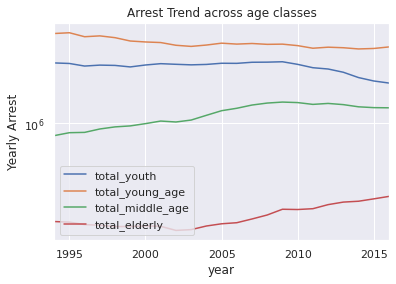

In [41]:
arrest_rate_by_age.plot(logy=True, title='Arrest Trend across age classes', ylabel='Yearly Arrest')

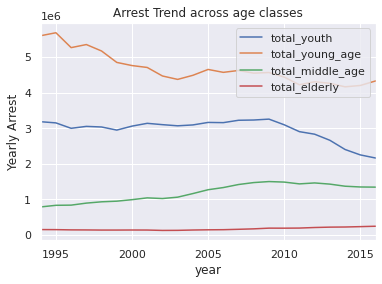

In [42]:
arrest_rate_by_age.plot(title='Arrest Trend across age classes', ylabel='Yearly Arrest')

Text(0.5, 1.0, 'Arrest Trend by age class')

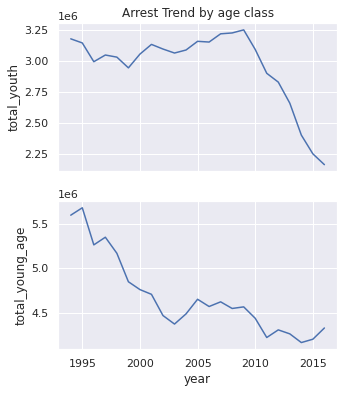

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=arrest_rate_by_age, x=arrest_rate_by_age.index.year, y='total_youth', ax=ax1)
ax1.set_title('Arrest Trend by age class')

sns.lineplot(data=arrest_rate_by_age, x=arrest_rate_by_age.index.year, y='total_young_age', ax=ax2)

plt.show()

Text(0.5, 1.0, 'Arrest Trend by Age Class')

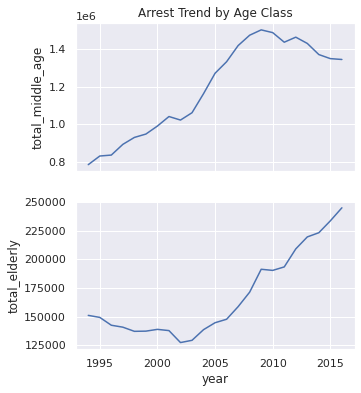

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=arrest_rate_by_age, x=arrest_rate_by_age.index.year, y='total_middle_age', ax=ax1)
ax1.set_title('Arrest Trend by Age Class')

sns.lineplot(data=arrest_rate_by_age, x=arrest_rate_by_age.index.year, y='total_elderly', ax=ax2)

plt.show()

In [45]:
# Over the period considered, we computed the total arrest by offense for the various age categories 
# and stored it as offense_by_age
offense_by_age = arrests.groupby('offense_name')['total_youth', 'total_young_age', 'total_middle_age', 
                                                 'total_elderly'].sum()
offense_by_age

<ipython-input-45-616a3e23daa6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offense_by_age = arrests.groupby('offense_name')['total_youth', 'total_young_age', 'total_middle_age',


,total_youth,total_young_age,total_middle_age,total_elderly
offense_name,,,,
Aggravated Assault,2058256,3921516,948749,149049
All Other Offenses,18312053,33008134,8261241,1136619
Arson,47417,67366,20756,3654
Burglary,1645324,1854550,327227,24866
Disorderly Conduct,3218238,4175237,1103047,162931
Drive Under the Influence,5870322,12754571,3966857,714454
Drug Abuse Violations,10094491,13136350,2684399,204401
Drunkenness,2369205,5277935,2075340,285539
Embezzlement,115030,145491,31988,3794


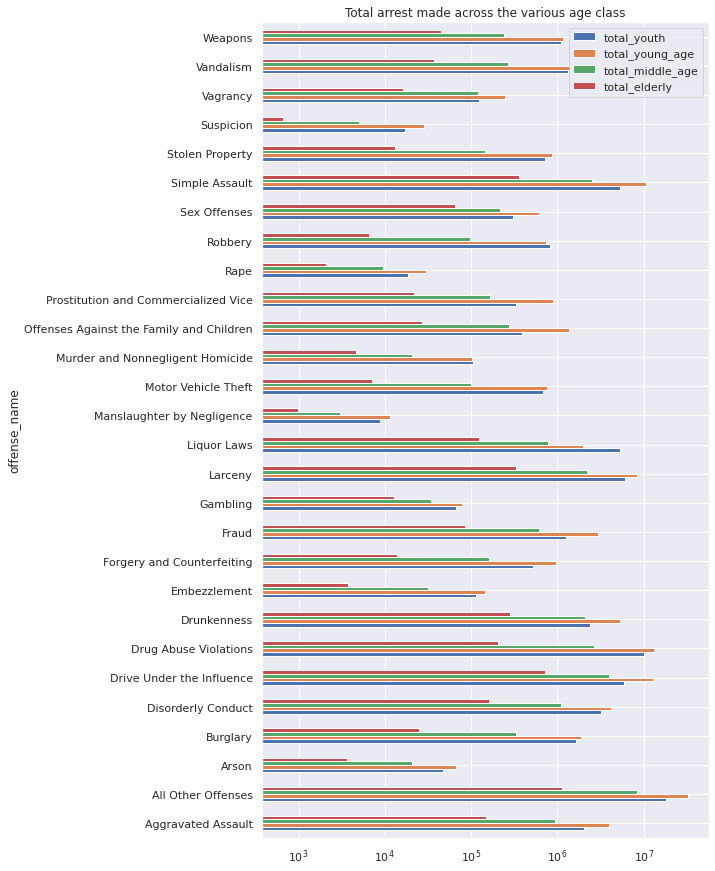

In [46]:
offense_by_age.plot(kind='barh', logx=True, title='Total arrest made across the various age class', figsize=(8,15))

In [47]:
offense_by_age.sort_values(by='total_middle_age', ascending =False, inplace=True)

Text(0.5, 1.0, 'Top 10 crimes among various Age Class')

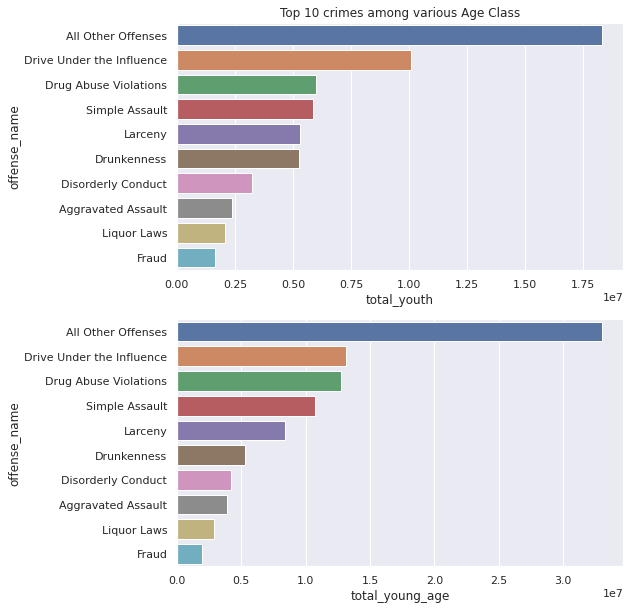

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= True, figsize=(8,10)) 

offense_youth=offense_by_age.sort_values(by='total_youth', ascending =False)
sns.barplot(data=offense_youth.iloc[:10], y=offense_by_age.index[:10], x='total_youth', ax=ax1)
ax1.set_title('Top 10 crimes among various Age Class')

offense_young=offense_by_age.sort_values(by='total_young_age', ascending =False)
sns.barplot(data=offense_young.iloc[:10], y=offense_by_age.index[:10], x='total_young_age', ax=ax2)

plt.show()

Text(0.5, 1.0, 'Top 10 crimes among various Age Class')

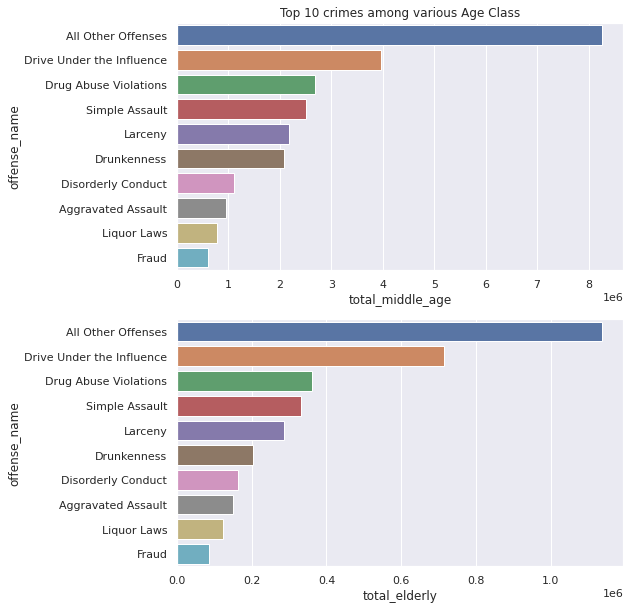

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= True, figsize=(8,10)) 

offense_middle=offense_by_age.sort_values(by='total_middle_age', ascending =False)
sns.barplot(data=offense_middle.iloc[:10], y=offense_by_age.index[:10], x='total_middle_age', ax=ax1)
ax1.set_title('Top 10 crimes among various Age Class')

offense_elder=offense_by_age.sort_values(by='total_elderly', ascending =False)
sns.barplot(data=offense_elder.iloc[:10], y=offense_by_age.index[:10], x='total_elderly', ax=ax2)

plt.show()

Text(0.5, 1.0, 'Least 10 crimes among various Age Class')

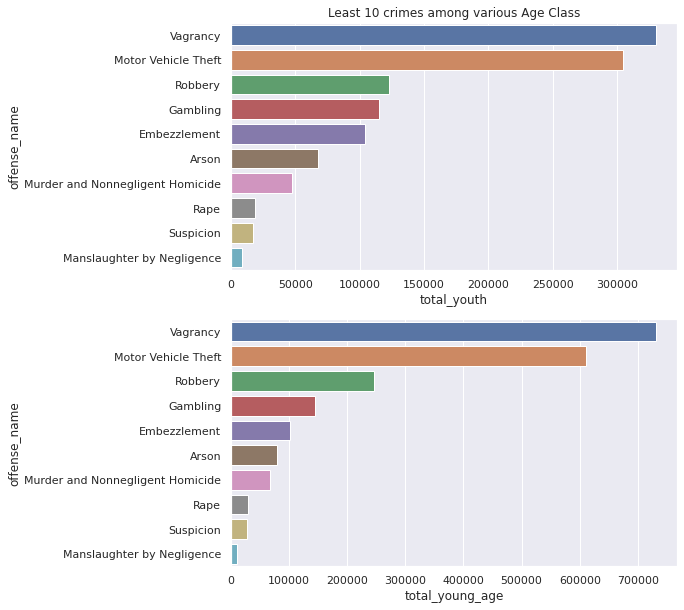

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= True, figsize=(8,10)) 

offense_youth=offense_by_age.sort_values(by='total_youth', ascending =False)
sns.barplot(data=offense_youth.iloc[-10:], y=offense_by_age.index[-10:], x='total_youth', ax=ax1)
ax1.set_title('Least 10 crimes among various Age Class')

offense_young=offense_by_age.sort_values(by='total_young_age', ascending =False)
sns.barplot(data=offense_young.iloc[-10:], y=offense_by_age.index[-10:], x='total_young_age', ax=ax2)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= False, figsize=(8,10)) 

offense_middle=offense_by_age.sort_values(by='total_middle_age', ascending =True)
sns.barplot(data=offense_middle.iloc[-10:], y=offense_by_age.index[-10:], x='total_middle_age', ax=ax1)
ax1.set_title('Least 10 crimes among various Age Class')

offense_elder=offense_by_age.sort_values(by='total_elderly', ascending =True)
sns.barplot(data=offense_elder.iloc[-10:], y=offense_by_age.index[-10:], x='total_elderly', ax=ax2)

plt.show()

Text(0.5, 1.0, 'Least 10 crimes among various Age Class')

## Analysis by gender
1. We subset the dataframe for total yearly arrest by gender
2. We made visual display of this subset
3. Over the 23 year period, we subset the dataframe for total arrest by gender for each of the 28 offenses and then represented this on bar charts

In [ ]:
# The yearly total arrest by gender was also calculated and stored as arrest_rate_by_gender
arrest_rate_by_gender = arrests.groupby('year')['total_male', 'total_female', ].sum()
arrest_rate_by_gender

In [ ]:
arrest_rate_by_gender.plot(title='Arrest Trend across gender', ylabel='Yearly Arrest')

In [ ]:
arrest_rate_by_gender.plot(logy=True, title='Arrest Trend across gender', ylabel='Yearly Arrest')

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=arrest_rate_by_gender, x=arrest_rate_by_gender.index.year, y='total_male', ax=ax1)
ax1.set_title('Arrest Trend by Gender')

sns.lineplot(data=arrest_rate_by_gender, x=arrest_rate_by_gender.index.year, y='total_female', ax=ax2)

plt.show()

In [ ]:
# We computed the total arrest by offense for each gender and stored it as offence_by_gender
offence_by_gender = arrests.groupby('offense_name')['total_male', 'total_female'].sum()
offence_by_gender

In [ ]:
offence_by_gender.sort_values(by='total_male', ascending = True, inplace=True)
offence_by_gender.plot(kind='barh', figsize=(8,15), logx=True, title='Total arrest by crime across gender')

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= False, figsize=(7,10)) 

offence_by_gender.iloc[:5].plot(kind='barh', logx=True, title='Least crime across gender by male', ax=ax1)

offence_by_gender.iloc[-5:].plot(kind='barh', logx=False, title='Top crime across gender by male', ax=ax2)


plt.show()

In [ ]:
offence_by_gender.iloc[:5].plot(kind='barh', figsize=(5,5), logx=True, title='Least crime across gender sorted by total male')

In [ ]:
offence_by_gender.iloc[-5:].plot(kind='barh', figsize=(5,5), logx=False, title='Top crime across gender sorted by total male')

In [ ]:
offence_by_gender.sort_values(by='total_female', ascending = True, inplace=True)

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = False, sharey= False, figsize=(7,10)) 

offence_by_gender.iloc[:5].plot(kind='barh', logx=True, title='Least crime across gender by female', ax=ax1)

offence_by_gender.iloc[-5:].plot(kind='barh', logx=False, title='Top crime across gender by female', ax=ax2)


plt.show()

In [ ]:
# Mean ratio of yearly total female arrested
a = arrest_rate_by_gender.total_female/(arrest_rate_by_gender.total_female + arrest_rate_by_gender.total_male)
a.mean()

In [ ]:
#arrest proportion of female in 1994
arrest_rate_by_gender.total_female[0]/(arrest_rate_by_gender.total_female[0] + arrest_rate_by_gender.total_male[0])
print()
#arrest proportion of female in 2016
arrest_rate_by_gender.total_female[-1]/(arrest_rate_by_gender.total_female[-1] + arrest_rate_by_gender.total_male[-1])

##Analysis by race
1. We subset the dataframe for total yearly arrest by race
2. We made visual display of this subset
3. Over the 23 year period, we subset the dataframe for total arrest for each race for the 28 offenses and then represented this on bar charts

In [ ]:
# The yearly total arrest of the various age categories was calculated and stored as arrest_rate_by_race
arrest_rate_by_race = arrests.groupby('year')['white', 'black', 'asian_pacific_islander', 
                                                  'american_indian', 'unknown_race'].sum()
arrest_rate_by_race

In [ ]:
arrest_rate_by_race.plot(title='Arrest Trend across gender', ylabel='Yearly Arrest')

In [ ]:
arrest_rate_by_race.plot(logy=True, title='Arrest Trend across race', ylabel='Yearly Arrest')

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=arrest_rate_by_race, x=arrest_rate_by_race.index.year, y = 'white', ax=ax1)
ax1.set_title('Arrest Trend by race')

sns.lineplot(data=arrest_rate_by_race, x=arrest_rate_by_race.index.year, y = 'black', ax=ax2)

plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =3, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=arrest_rate_by_race, x=arrest_rate_by_race.index.year, y = 'asian_pacific_islander', ax=ax1)
ax1.set_title('Arrest Trend by race')

sns.lineplot(data=arrest_rate_by_race, x=arrest_rate_by_race.index.year, y = 'american_indian', ax=ax2)

sns.lineplot(data=arrest_rate_by_race, x=arrest_rate_by_race.index.year, y = 'unknown_race', ax=ax3)

plt.show()

In [ ]:
# We also computed the total arrest by offense for the various race and stored as offense_by_race
offense_by_race = arrests.groupby('offense_name')['white', 'black', 'asian_pacific_islander', 
                                                  'american_indian', 'unknown_race'].sum()
offense_by_race

In [ ]:
offense_by_race.plot(kind='barh',  figsize=(8,15), logx=True)

## Grouping and Analysis of offenses

We decided to group the offense names into two (2) categories; Part I and Part II. The Uniform Crime Reporting (UCR) Program divides offenses into two groups, Part I and Part II crimes, in its Summary Reporting System. 
Part I Offenses include murder, rape, aggravated assault, robbery, burglary, larceny, motor vehicle theft, arson, human trafficking – commercial sex acts, and human trafficking – involuntary servitude. These crimes were chosen by the FBI because of their uniformity of definition, total volumes, and likelihood of being reported. They are also referred to as serious crimes. 

**(Roseville, MN - Official Website | Official Website, n.d.; "Offense definitions," n.d.)**




We decided to group the offense names into two (2) categories; 

Part I and 

Part II. 

The Uniform Crime Reporting (UCR) Program divides offenses into two groups, Part I and Part II crimes, in its Summary Reporting System. 
Part I Offenses include murder, rape, aggravated assault, robbery, burglary, larceny, motor vehicle theft, arson, human trafficking – commercial sex acts, and human trafficking – involuntary servitude. These crimes were chosen by the FBI because of their uniformity of definition, total volumes, and likelihood of being reported. They are also referred to as serious crimes. 

**(Roseville, MN - Official Website | Official Website, n.d.; "Offense definitions," n.d.)**

In [ ]:
part_I = ['criminal homicide', 'rape', 'robbery', 'aggravated assault', 'burglary',  'larceny', ''
          'motor vehicle theft', 'arson', 'human trafficking, commercial sex acts', 'murder and nonnegligent homicide', 
          'human Trafficking, involuntary servitude']

part_II = ['simple assault', 'other assaults', 'forgery and counterfeiting', 'fraud', 'embezzlement', 'stolen property', 
         'vandalism', 'weapons', 'prostitution and commercialized vice', 'sex offenses', 'drug abuse violations', 
         'gambling', 'offenses against the family and children', 'drive under the influence', 'liquor laws', 
         'drunkenness', 'disorderly conduct', 'vagrancy', 'suspicion', 'curfew and loitering laws', 
          'manslaughter by negligence', 'all other offenses']


# Define a category fuction and then use .apply to create offense groups
def category(offense):
    '''Takes the offense name as input and returns the offense group'''
    if offense in part_I:
        return 'serious offense'
    elif offense in part_II:
        return 'less serious offense'
    else:
        return offense
    

arrests['offense_group'] = arrests['offense_name'].str.lower().apply(category)

arrests['offense_group'] = arrests['offense_group'].astype('category')

In [ ]:
arrests['offense_group'].value_counts()

In [ ]:
arrests['offense_group'].shape
print()
arrests['offense_group'].dtype

We've successfully grouped the offense names into the two groups; Part I (often reffered to as **serious offense**) and Part II (also called **less serious offense**) as grouped by the FBI. We can then proceed to subset the yearly arrest of the various age group by offense group

In [ ]:
# The yearly total arrest of the various age categories was calculated and stored as arrest_rate_by_race
grp_race_arrest = arrests.groupby(['year', 'offense_group'])['white', 'black', 'asian_pacific_islander', 
                                                  'american_indian', 'unknown_race'].sum()
grp_race_arrest


In [ ]:
# Over the period considered, we computed the total arrest by offense for the various age categories 
# and stored it as offense_by_age
offense_grp_by_age = arrests.groupby('offense_group')['total_youth', 'total_young_age', 'total_middle_age', 
                                                 'total_elderly'].sum()
offense_grp_by_age

In [ ]:
offense_grp_by_age.plot(kind='barh', logx=True)

# Other computations

In [ ]:
# We computed the proportion of arrest made per 100,000 of the population and stored it as ratio_arrested
arrests['ratio_arrested'] = arrests.total_arrested / arrests.population * 100000

In [ ]:
arrests.groupby('year')['ratio_arrested'].sum()

In [ ]:
arrests.groupby('year')['total_arrested'].sum().plot(ylabel='Total Yearly Arrest', title = 'Yearly Arrest Trend')

In [ ]:
proportion = pd.DataFrame(arrests.groupby('year')['ratio_arrested'].sum())

In [ ]:
proportion.plot(marker ='o')
plt.title('Yearly Arrest Trend in each 100,000 Population')
plt.ylabel(' Yearly arrest per 100,000 of population')

In [ ]:
proportion.head(2)

In [ ]:
proportion[proportion.ratio_arrested==proportion.ratio_arrested.min()]
print()
proportion[proportion.ratio_arrested==proportion.ratio_arrested.max()]

In [85]:
arrests.groupby('year')['ratio_arrested'].sum().max()

4840.632832235633

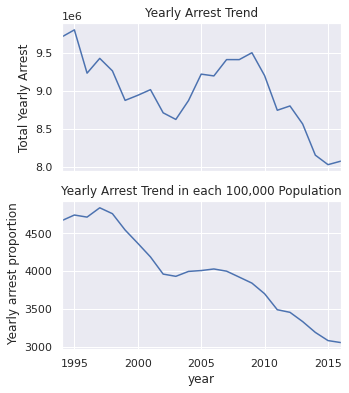

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

arrests.groupby('year')['total_arrested'].sum().plot(ylabel='Total Yearly Arrest', title = 'Yearly Arrest Trend', ax=ax1)
arrests.groupby('year')['ratio_arrested'].sum().plot(ylabel=' Yearly arrest proportion', title = 'Yearly Arrest Trend in each 100,000 Population', ax=ax2)


plt.show()

# Additional Visualizations

In [87]:
arrests.loc[arrests.offense_name == 'All Other Offenses']

,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,...,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_arrested,unknown_race,total_youth,total_young_age,total_middle_age,total_elderly,offense_group,ratio_arrested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1027,2016-01-01,ASR_OTH,All Other Offenses,13310,264534532,1889247,675720,45099,55750,61572,67406,70304,73344,75213,352861,...,5956,12581,263887632,1762233,699715,35101,50532,2564967,"17,386.00",602101,1448218,437253,77395,less serious offense,969.62
999,2015-01-01,ASR_OTH,All Other Offenses,13404,260792111,1846340,649524,46351,57674,64065,71035,73398,75251,76268,338543,...,5824,12728,259649328,1695400,699613,35848,48948,2495864,"16,055.00",619036,1373583,429918,73327,less serious offense,957.03
971,2014-01-01,ASR_OTH,All Other Offenses,12854,255852212,1829587,633136,48744,60546,68192,75754,77267,77436,75377,328696,...,5293,12220,254957718,1660318,718251,27602,41308,2462723,"15,244.00",644223,1323544,426466,68490,less serious offense,962.56
943,2013-01-01,ASR_OTH,All Other Offenses,12397,257195726,1903938,646458,53255,66709,74053,81545,92029,79941,76279,338766,...,5130,11925,248045485,1705570,750131,26234,42561,2550396,"25,900.00",694846,1348758,431595,75197,less serious offense,991.62
915,2012-01-01,ASR_OTH,All Other Offenses,12850,254953025,1964281,648443,63059,76825,83807,90419,87859,82856,77848,341770,...,5028,12341,254321505,1729945,792101,37374,40472,2612724,"12,832.00",743760,1349090,455672,64202,less serious offense,"1,024.79"
887,2011-01-01,ASR_OTH,All Other Offenses,12628,250795788,1988519,643062,68813,82962,89058,93482,88250,82973,79027,345305,...,4615,12167,250082691,1743189,800970,33377,42984,2631581,"11,061.00",769789,1349749,452167,59876,less serious offense,"1,049.29"
859,2010-01-01,ASR_OTH,All Other Offenses,12727,248792692,2108796,663333,77260,92011,97077,99820,92480,87922,84533,370030,...,4311,12208,248091098,1826975,855706,33774,42139,2772129,"13,535.00",825788,1422123,466749,57469,less serious offense,"1,114.23"
831,2009-01-01,ASR_OTH,All Other Offenses,12923,247547472,2143081,657893,83741,98383,100499,101114,95108,90075,85956,374679,...,8543,12466,246779693,1846081,862251,34374,41740,2800974,"16,528.00",846905,1428882,463233,61954,less serious offense,"1,131.49"
803,2008-01-01,ASR_OTH,All Other Offenses,12302,240194764,2134583,627436,86136,98001,98527,101054,95576,90869,84135,369438,...,3927,11876,239340967,1823303,852949,34028,37818,2762019,"13,921.00",835291,1418085,457578,51065,less serious offense,"1,149.91"


Text(0.5, 1.0, 'Yearly Male Arrest Trend for All Other Offenses')

Text(0, 0.5, 'Total Male Arrest')

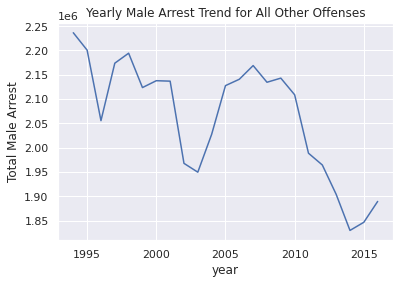

In [88]:
sns.lineplot(data =arrests.loc[arrests.offense_name == 'All Other Offenses'], x = arrests.year.dt.year, y = 'total_male')
plt.title('Yearly Male Arrest Trend for All Other Offenses')
plt.ylabel('Total Male Arrest')

Text(0.5, 1.0, 'Yearly Female Arrest Trend for All Other Offenses')

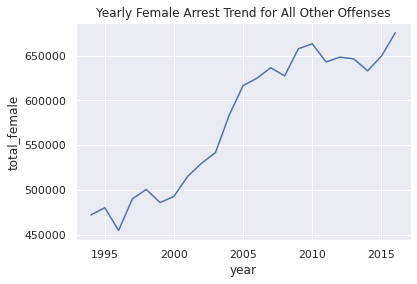

In [89]:
sns.lineplot(data =arrests.loc[arrests.offense_name == 'All Other Offenses'], x = arrests.year.dt.year, y = 'total_female')
plt.title('Yearly Female Arrest Trend for All Other Offenses')

In [90]:
arrests.loc[arrests.offense_name == 'Rape']

,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,m_19,m_20,m_21,m_22,m_23,m_24,m_25_29,...,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_arrested,unknown_race,total_youth,total_young_age,total_middle_age,total_elderly,offense_group,ratio_arrested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1030,2016-01-01,ASR_RPE,Rape,13310,264534532,15783,413,794,735,654,659,603,514,528,2329,...,5,12581,263887632,10942,4549,348,211,16196,146.00,4596,8108,2736,756,serious offense,6.12
1002,2015-01-01,ASR_RPE,Rape,13404,260792111,15148,433,785,757,703,650,589,506,551,2243,...,1,12728,259649328,10491,4383,325,269,15581,113.00,4657,7705,2587,632,serious offense,5.97
890,2011-01-01,ASR_RPE,Rape,12628,250795788,13435,141,727,712,675,678,571,494,461,2163,...,1,12167,250082691,8916,4214,209,176,13576,61.00,4358,6701,2129,388,serious offense,5.41
778,2007-01-01,ASR_RPE,Rape,12363,235465952,14987,144,854,811,757,786,619,565,560,2396,...,1,11916,234827513,9745,4931,207,190,15131,58.00,5000,7766,2040,325,serious offense,6.43


Text(0.5, 1.0, 'Yearly Female Arrest Trend for Rape')

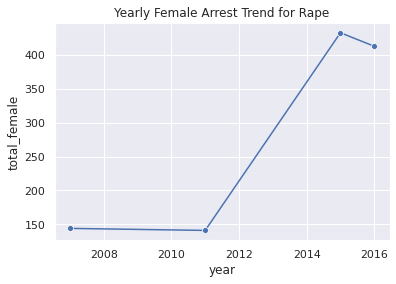

In [91]:
sns.lineplot(data = arrests.loc[arrests.offense_name == 'Rape'], x = arrests.year.dt.year, y = 'total_female', marker='o')
plt.title('Yearly Female Arrest Trend for Rape')

Text(0.5, 1.0, 'Arrest Trend for All Other Offensese')

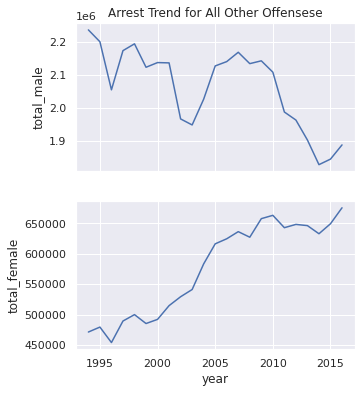

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data =arrests.loc[arrests.offense_name == 'All Other Offenses'], x = arrests.year.dt.year, y = 'total_male', ax=ax1)
ax1.set_title('Arrest Trend for All Other Offensese')

sns.lineplot(data =arrests.loc[arrests.offense_name == 'All Other Offenses'], x = arrests.year.dt.year, y = 'total_female', ax=ax2)



# Trends of Arrest grouping

## By Race

In [93]:
part1_race_arrest = grp_race_arrest.query("offense_group == 'serious offense'")
part1_race_arrest

,,white,black,asian_pacific_islander,american_indian,unknown_race
year,offense_group,,,,,
1994-01-01,serious offense,971898,622062,18228,14204,"1,561.00"
1995-01-01,serious offense,965010,629205,19339,14339,"1,856.00"
1996-01-01,serious offense,864080,540412,19282,15166,"1,936.00"
1997-01-01,serious offense,847149,541996,19535,14742,"2,040.00"
1998-01-01,serious offense,804036,489354,18305,13800,"5,362.00"
1999-01-01,serious offense,745082,440219,16582,13136,"2,241.00"
2000-01-01,serious offense,739761,428312,16450,13272,"4,583.00"
2001-01-01,serious offense,780818,443573,16943,12728,"1,885.00"
2002-01-01,serious offense,806583,417182,16373,13106,"2,158.00"


In [94]:
part2_race_arrest = grp_race_arrest.query("offense_group == 'less serious offense'")
part2_race_arrest

,,white,black,asian_pacific_islander,american_indian,unknown_race
year,offense_group,,,,,
1994-01-01,less serious offense,5448568,2460272,66756,89408,"24,156.00"
1995-01-01,less serious offense,5439314,2552494,72156,92198,"25,197.00"
1996-01-01,less serious offense,5253166,2343630,73402,102490,"25,553.00"
1997-01-01,less serious offense,5279479,2530248,74705,98526,"26,169.00"
1998-01-01,less serious offense,5255136,2463281,81439,93524,"44,968.00"
1999-01-01,less serious offense,5131167,2326612,70442,97660,"36,303.00"
2000-01-01,less serious offense,5186400,2342991,72851,96253,"45,752.00"
2001-01-01,less serious offense,5248446,2330277,77585,92879,"16,050.00"
2002-01-01,less serious offense,5253449,2011385,78023,100434,"16,468.00"


In [95]:
part2_race_arrest.index

MultiIndex([('1994-01-01', 'less serious offense'),
            ('1995-01-01', 'less serious offense'),
            ('1996-01-01', 'less serious offense'),
            ('1997-01-01', 'less serious offense'),
            ('1998-01-01', 'less serious offense'),
            ('1999-01-01', 'less serious offense'),
            ('2000-01-01', 'less serious offense'),
            ('2001-01-01', 'less serious offense'),
            ('2002-01-01', 'less serious offense'),
            ('2003-01-01', 'less serious offense'),
            ('2004-01-01', 'less serious offense'),
            ('2005-01-01', 'less serious offense'),
            ('2006-01-01', 'less serious offense'),
            ('2007-01-01', 'less serious offense'),
            ('2008-01-01', 'less serious offense'),
            ('2009-01-01', 'less serious offense'),
            ('2010-01-01', 'less serious offense'),
            ('2011-01-01', 'less serious offense'),
            ('2012-01-01', 'less serious offense'),
            

In [96]:
part2_race_arrest.index.get_level_values(0).year

Int64Index([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='year')

Text(0.5, 1.0, 'Part 2 crtime arrest trend')

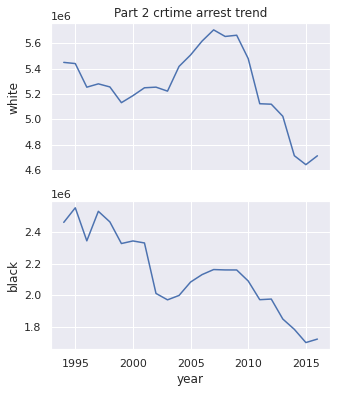

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=part2_race_arrest, x=part2_race_arrest.index.get_level_values(0).year, y='white', ax=ax1)
ax1.set_title('Part 2 crtime arrest trend')

sns.lineplot(data=part2_race_arrest, x=part2_race_arrest.index.get_level_values(0).year, y='black', ax=ax2)

plt.show()

Text(0.5, 1.0, 'Part 1 crtime arrest trend')

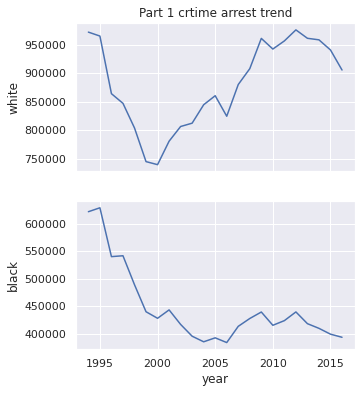

In [98]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=part1_race_arrest, x=part1_race_arrest.index.get_level_values(0).year, y='white', ax=ax1)
ax1.set_title('Part 1 crtime arrest trend')

sns.lineplot(data=part1_race_arrest, x=part1_race_arrest.index.get_level_values(0).year, y='black', ax=ax2)

plt.show()

## By Gender

In [99]:
# The yearly total arrest by gender was also calculated and stored as arrest_rate_by_gender
offense_grp_by_gender = arrests.groupby(['year', 'offense_group'])['total_male', 'total_female', ].sum()
offense_grp_by_gender



<ipython-input-99-c107d2e2465b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offense_grp_by_gender = arrests.groupby(['year', 'offense_group'])['total_male', 'total_female', ].sum()


total_male  total_female
year       offense_group                                 
1994-01-01 less serious offense     6641523       1447637
           serious offense          1240929        387024
1995-01-01 less serious offense     6681182       1500177
           serious offense          1240765        388984
1996-01-01 less serious offense     6341194       1457047
           serious offense          1086040        354836
1997-01-01 less serious offense     6485112       1524015
           serious offense          1065276        360186
1998-01-01 less serious offense     6413923       1524425
           serious offense           991066        339791
1999-01-01 less serious offense     6183450       1478734
           serious offense           902797        314463
2000-01-01 less serious offense     6237783       1506464
           serious offense           891564        310814
2001-01-01 less serious offense     6217303       1547934
           serious offense           929919        326028
2002-01-01 less serious offense     5881766       1577993
           serious offense           923863        331539
2003-01-01 less serious offense     5798151       1590214
           serious offense           906333        332938
2004-01-01 less serious offense     5940609       1674809
           serious offense           913958        347918
2005-01-01 less serious offense     6168331       1761673
           serious offense           936714        359567
2006-01-01 less serious offense     6190031       1772539
           serious offense           903851        336178
2007-01-01 less serious offense     6274600       1815057
           serious offense           949045        379598
2008-01-01 less serious offense     6235276       1810016
           serious offense           958359        414420
2009-01-01 less serious offense     6204017       1863410
           serious offense           974046        467640
2010-01-01 less serious offense     5970102       1837701
           serious offense           939546        458720
2011-01-01 less serious offense     5563537       1762903
           serious offense           956885        465483
2012-01-01 less serious offense     5558749       1784068
           serious offense           970900        492000
2013-01-01 less serious offense     5410103       1730609
           serious offense           942246        484391
2014-01-01 less serious offense     5060126       1678091
           serious offense           926261        490900
2015-01-01 less serious offense     4964354       1673694
           serious offense           917069        474863
2016-01-01 less serious offense     5005939       1720072
           serious offense           906918        442957

In [100]:
part1_gender_arrest = offense_grp_by_gender.query("offense_group == 'serious offense'")
part1_gender_arrest

,,total_male,total_female
year,offense_group,,
1994-01-01,serious offense,1240929,387024
1995-01-01,serious offense,1240765,388984
1996-01-01,serious offense,1086040,354836
1997-01-01,serious offense,1065276,360186
1998-01-01,serious offense,991066,339791
1999-01-01,serious offense,902797,314463
2000-01-01,serious offense,891564,310814
2001-01-01,serious offense,929919,326028
2002-01-01,serious offense,923863,331539


In [101]:
part2_gender_arrest = offense_grp_by_gender.query("offense_group == 'less serious offense'")
part2_gender_arrest

,,total_male,total_female
year,offense_group,,
1994-01-01,less serious offense,6641523,1447637
1995-01-01,less serious offense,6681182,1500177
1996-01-01,less serious offense,6341194,1457047
1997-01-01,less serious offense,6485112,1524015
1998-01-01,less serious offense,6413923,1524425
1999-01-01,less serious offense,6183450,1478734
2000-01-01,less serious offense,6237783,1506464
2001-01-01,less serious offense,6217303,1547934
2002-01-01,less serious offense,5881766,1577993


Text(0.5, 1.0, 'Part I crime Arrest Trend across gender')

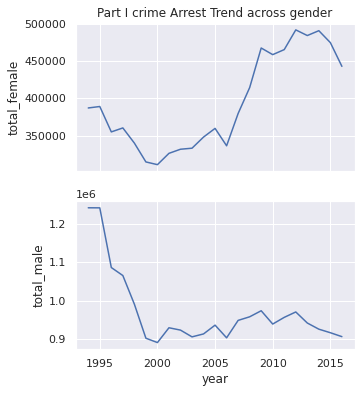

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=part1_gender_arrest, x=part1_gender_arrest.index.get_level_values(0).year, y='total_female', ax=ax1)
ax1.set_title('Part I crime Arrest Trend across gender')

sns.lineplot(data=part1_gender_arrest, x=part1_gender_arrest.index.get_level_values(0).year, y='total_male', ax=ax2)


plt.show()

Text(0.5, 1.0, 'Part II crime Arrest Trend across gender')

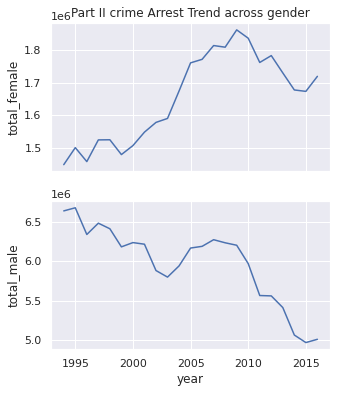

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows =2, ncols= 1, sharex = True, sharey= False, figsize=(5,6)) 

sns.lineplot(data=part2_gender_arrest, x=part2_gender_arrest.index.get_level_values(0).year, y='total_female', ax=ax1)
ax1.set_title('Part II crime Arrest Trend across gender')

sns.lineplot(data=part2_gender_arrest, x=part2_gender_arrest.index.get_level_values(0).year, y='total_male', ax=ax2)


plt.show()

# Other Summaries

In [104]:
# The yearly total arrest by gender was also calculated and stored as arrest_rate_by_gender
arrest_population_year = arrests.groupby(['year', 'population'])['total_male', 'total_female', 'total_arrested'].sum()
arrest_population_year



<ipython-input-104-a9cde864b7ac>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arrest_population_year = arrests.groupby(['year', 'population'])['total_male', 'total_female', 'total_arrested'].sum()


,,total_male,total_female,total_arrested
year,population,,,
1994-01-01,208091172,7882452,1834661,9717113
1995-01-01,206783051,7921947,1889161,9811108
1996-01-01,195867829,7427234,1811883,9239117
1997-01-01,194904041,7550388,1884201,9434589
1998-01-01,194637946,7404989,1864216,9269205
1999-01-01,195331899,7086247,1793197,8879444
2000-01-01,204743363,7129347,1817278,8946625
2001-01-01,215369937,7147222,1873962,9021184
2002-01-01,220019017,6805629,1909532,8715161


In [105]:
# Proportion of population arrested in 1994
print('Proportion of the population arrested in', arrest_population_year.index.get_level_values(0).year[0], 'was: \t', arrest_population_year.total_arrested.iloc[0]/arrest_population_year.index.get_level_values(1)[0])

# Proportion of population arrested in 2016
print('Proportion of the population arrested in', arrest_population_year.index.get_level_values(0).year[-1], 'was: \t', arrest_population_year.total_arrested.iloc[-1]/arrest_population_year.index.get_level_values(1)[-1])


Proportion of the population arrested in 1994 was: 	 0.04669642112448672
Proportion of the population arrested in 2016 was: 	 0.030528664590375672


In [106]:
arrest_population_year.index.get_level_values(1)[-1] == 264534532


True

In [108]:
(3052-4669) / 4669 * 100
print()
(0.030528664590375672 - 0.04669642112448672) / 0.04669642112448672 * 100

-34.63268365817092

-34.623117028625956

In [109]:
#Standardizing the population to 100,000 makes a room for fairness 
Arrest_per_100k_1994 = arrest_population_year.total_arrested.iloc[0] * 100000//arrest_population_year.index.get_level_values(1)[0]

Arrest_per_100k_2016 = arrest_population_year.total_arrested.iloc[-1] * 100000//arrest_population_year.index.get_level_values(1)[-1]

# Percentage change in arrest rate per 100,000 population between 1994 and 2016 is
(Arrest_per_100k_2016 - Arrest_per_100k_1994) / Arrest_per_100k_1994 * 100

-34.63268365817092

In [110]:
Arrest_1994 = arrest_population_year.total_arrested.iloc[0]

Arrest_2016 = arrest_population_year.total_arrested.iloc[-1]


# Percentage change in number of arrest between 1994 and 2016
(Arrest_2016 - Arrest_1994) / Arrest_1994 * 100



-16.890068068571395

In [111]:
Arrest_female_1994 = arrest_population_year.total_female.iloc[0]

Arrest_female_2016 = arrest_population_year.total_female.iloc[-1]


# Percentage change in number of  female arrest between 1994 and 2016
(Arrest_female_2016 - Arrest_female_1994) / Arrest_female_1994 * 100

17.8980203972287

In [112]:
Arrest_male_1994 = arrest_population_year.total_male.iloc[0]

Arrest_male_2016 = arrest_population_year.total_male.iloc[-1]

# Percentage change in number of  male arrest between 1994 and 2016
(Arrest_male_2016 - Arrest_male_1994) / Arrest_male_1994 * 100

-24.987085236928813

In [107]:
# Proportion of 100,000 of the population arrested 
for i in range(arrest_population_year.shape[0]):
  print('Approimately, in every 100,000 population in', arrest_population_year.index.get_level_values(0).year[i], ':\t', arrest_population_year.total_arrested.iloc[i] * 100000//arrest_population_year.index.get_level_values(1)[i], '\twas arrested')


Approimately, in every 100,000 population in 1994 :	 4669 	was arrested
Approimately, in every 100,000 population in 1995 :	 4744 	was arrested
Approimately, in every 100,000 population in 1996 :	 4717 	was arrested
Approimately, in every 100,000 population in 1997 :	 4840 	was arrested
Approimately, in every 100,000 population in 1998 :	 4762 	was arrested
Approimately, in every 100,000 population in 1999 :	 4545 	was arrested
Approimately, in every 100,000 population in 2000 :	 4369 	was arrested
Approimately, in every 100,000 population in 2001 :	 4188 	was arrested
Approimately, in every 100,000 population in 2002 :	 3961 	was arrested
Approimately, in every 100,000 population in 2003 :	 3931 	was arrested
Approimately, in every 100,000 population in 2004 :	 3996 	was arrested
Approimately, in every 100,000 population in 2005 :	 4008 	was arrested
Approimately, in every 100,000 population in 2006 :	 4028 	was arrested
Approimately, in every 100,000 population in 2007 :	 3999 	was a